In [ ]:
#Kickstarter data assignment: Using any means necessary (including regression) find the following:

# 1) Find the amount at which goals become far less likely to be reached.

# 2) Find the number of backers at which kickstarters become far more likely to be funded.

In [10]:
#import kickstarter data

import pandas as pd
import numpy as np
location = 'kickstarter.xls'
df = pd.read_excel(location)
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [11]:
#create new column with numeric value for success of kickstarter, so that statsmodels regression can be used

df['is_success'] = np.where(df['state'] == 'successful', 1, 0)
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


In [12]:
#calculate general probability of success for a given project in the dataset

print('total projects =', len(df))
print('total successful =', df['is_success'].sum())
print('probability of success =', df['is_success'].mean())
p_success_all = df['is_success'].mean()

total projects = 65535
total successful = 23404
probability of success = 0.35712214847028306


In [ ]:
# 1) Find the amount at which goals become far less likely to be reached.

In [ ]:
#1a) Method: Visualizing with scatter plot

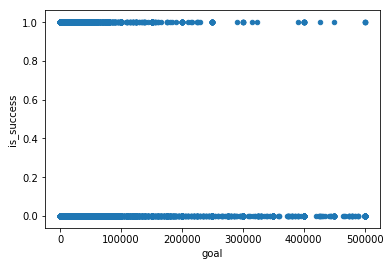

In [6]:
# plot success for projects with goals <= $500,000

toprange = 500000
copydf = df
copydf = copydf.drop(copydf[copydf['goal'] > toprange].index)

import matplotlib.pyplot as plt
copydf.plot(x='goal', y='is_success', kind='scatter')

# in the plot below, success appears to decrease significantly for goals greater than approx. $250,000 

In [46]:
# function to calculate probability of success for goals within a range
def find_p_success_goal (mingoal, maxgoal):
    tempdf = df
    tempdf = tempdf.drop(tempdf[tempdf['goal'] < mingoal].index)
    tempdf = tempdf.drop(tempdf[tempdf['goal'] > maxgoal].index)
    return tempdf['is_success'].mean()

In [47]:
print('probability of success for goal <= $250,000 =',find_p_success_goal(0,250000))
print('probability of success for goal >= $250,000 =',find_p_success_goal(250000,df['goal'].max()))
find_p_success_goal(0,250000) / find_p_success_goal(250000,df['goal'].max()) #7.497517793235855
print('goals of $250,000 or less are approx. 7.5 times more likely to be successful')

probability of success for goal <= $250,000 = 0.3615727416210194
probability of success for goal >= $250,000 = 0.048225659690627844
goals of $250,000 or less are approx. 7.5 times more likely to be successful


In [ ]:
#1b) Method: OLS regression

In [20]:
#OLS regression for dependent variable 'is_success', independent variable 'goal' for all data in df
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ goal', data=df).fit()
result.rsquared #0.0006098099940409218 low R-squared value
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             is_success   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     39.99
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           2.57e-10
Time:                        02:57:34   Log-Likelihood:                -44753.
No. Observations:               65535   AIC:                         8.951e+04
Df Residuals:                   65533   BIC:                         8.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3576      0.002    190.952      0.000       0.354       0.361
goal       -1.145e-08   1.81e-09     -6.324      0.000    -1.5e-08    -7.9e-09
==============================================================================
Omnibus:                     3335.473   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11263.649
Skew:                           0.596   Prob(JB):                         0.00
Kurtosis:                       1.355   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#OLS regression for goals >= $250,000
mingoal = 250000
maxgoal = df['goal'].max()
tempdf = df
tempdf = tempdf.drop(tempdf[tempdf['goal'] < mingoal].index)
tempdf = tempdf.drop(tempdf[tempdf['goal'] > maxgoal].index)
    
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ goal', data=tempdf).fit()
result.rsquared #0.0014205937370576072
#R-squared greater than R-squared for all goals

0.0014205937370576072

In [22]:
#OLS regression for goals <= $250,000
mingoal = 0
maxgoal = 250000
tempdf = df
tempdf = tempdf.drop(tempdf[tempdf['goal'] < mingoal].index)
tempdf = tempdf.drop(tempdf[tempdf['goal'] > maxgoal].index)
    
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ goal', data=tempdf).fit()
result.rsquared #0.02792104261928252
#R-squared greater than R-squared for all goals

0.02792104261928252

In [ ]:
#1c) Method: logit regression
# Logistic regression is a more appropriate statistical model to use for a binary dependent variable 

In [30]:
import statsmodels.formula.api as sm
result = sm.logit('is_success ~ goal', df).fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.632087
         Iterations 10


In [31]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_success   No. Observations:                65535
Model:                          Logit   Df Residuals:                    65533
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                 0.03016
Time:                        03:24:56   Log-Likelihood:                -41424.
converged:                       True   LL-Null:                       -42712.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3512      0.010    -36.048      0.000      -0.370      -0.332
goal       -1.589e-05   4.49e-07    -35.412      0.000   -1.68e-05    -1.5e-05


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
# 2) Find the number of backers at which kickstarters become far more likely to be funded.

In [ ]:
#2a) Method: Visualizing with scatter plot

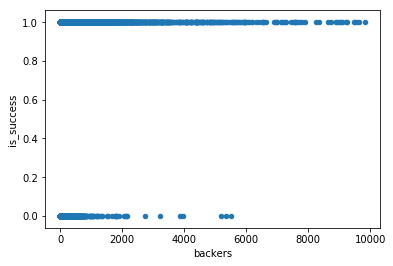

In [44]:
# plot success for projects with backers <= 10000

toprange = 10000
copydf = df
copydf = copydf.drop(copydf[copydf['backers'] > toprange].index)

import matplotlib.pyplot as plt
copydf.plot(x='backers', y='is_success', kind='scatter')

# in the plot below, success appears to increase significantly for projects with more than approx. 2,000 backers 

In [48]:
# function to calculate probability of success for backers within a range
def find_p_success_backers (minbackers, maxbackers):
    tempdf = df
    tempdf = tempdf.drop(tempdf[tempdf['backers'] < minbackers].index)
    tempdf = tempdf.drop(tempdf[tempdf['backers'] > maxbackers].index)
    return tempdf['is_success'].mean()

In [55]:
print('probability of success for backers <= 2,000 =',find_p_success_backers(0,2000))
print('probability of success for backers >= 2,000 =',find_p_success(2000,df['backers'].max()))
print('proportion of kickstarters with backers >= 2,000 =',len(df[df['backers']>=2000])/len(df))
print('97.5% of kickstarters with 2,000 or more backers are successful, however only 0.7% of kickstarters reach 2,000 backers')

probability of success for backers <= 2,000 = 0.35286616375005764
probability of success for backers >= 2,000 = 0.9755555555555555
proportion of kickstarters with backers >= 2,000 = 0.00686655985351339
97.5% of kickstarters with 2,000 or more backers are successful, however only 0.7% of kickstarters reach 2,000 backers


In [ ]:
#2b) Method: OLS regression

In [58]:
#OLS regression for dependent variable 'is_success', independent variable 'backers' for all data in df
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ backers', data=df).fit()
result.rsquared #0.021342229686717284 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             is_success   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1429.
Date:                Sat, 30 Jun 2018   Prob (F-statistic):          2.16e-309
Time:                        03:56:18   Log-Likelihood:                -44067.
No. Observations:               65535   AIC:                         8.814e+04
Df Residuals:                   65533   BIC:                         8.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3479      0.002    186.307      0.000       0.344       0.352
backers     8.771e-05   2.32e-06     37.804      0.000    8.32e-05    9.23e-05
==============================================================================
Omnibus:                     2526.584   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2734.471
Skew:                           0.485   Prob(JB):                         0.00
Kurtosis:                       2.758   Cond. No.                         812.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#OLS regression for backers >= 2,000
minbackers = 2000
maxbackers = df['backers'].max()
tempdf = df
tempdf = tempdf.drop(tempdf[tempdf['backers'] < minbackers].index)
tempdf = tempdf.drop(tempdf[tempdf['backers'] > maxbackers].index)
    
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ backers', data=tempdf).fit()
result.rsquared #0.0017662549711058295
#R-squared less than R-squared for all backers

0.0017662549711058295

In [60]:
#OLS regression for backers <= 2,000
minbackers = 0
maxbackers = 2000
tempdf = df
tempdf = tempdf.drop(tempdf[tempdf['backers'] < minbackers].index)
tempdf = tempdf.drop(tempdf[tempdf['backers'] > maxbackers].index)
    
import statsmodels.formula.api as sm
result = sm.ols(formula='is_success ~ backers', data=tempdf).fit()
result.rsquared #0.14990133809660777
#R-squared greater than R-squared for all backers

0.14990133809660777

In [ ]:
#2c) Method: logit regression
# Logistic regression is a more appropriate statistical model to use for a binary dependent variable 

In [61]:
import statsmodels.formula.api as sm
result = sm.logit('is_success ~ backers', df).fit()

Optimization terminated successfully.
         Current function value: 0.491259
         Iterations 10


In [62]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_success   No. Observations:                65535
Model:                          Logit   Df Residuals:                    65533
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                  0.2462
Time:                        04:00:56   Log-Likelihood:                -32195.
converged:                       True   LL-Null:                       -42712.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5365      0.012   -124.343      0.000      -1.561      -1.512
backers        0.0217      0.000     90.659      0.000       0.021       0.022
